In [22]:
from google.colab import files
uploaded = files.upload()   # manually upload file

Saving telecom_data.csv to telecom_data (1).csv


In [45]:
import pandas as pd
df=pd.read_csv("telecom_data.csv")

/tmp/ipython-input-1154390169.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("telecom_data.csv")


In [46]:
df.head()

,year,month,circle,type_of_connection,service_provider,value,unit,notes
0,2025,April,Andhra Pradesh,wireless,Bharti Airtel (Including Tata Tele.),33965795,value in absolute number,NaN
1,2025,April,Assam,wireless,Bharti Airtel (Including Tata Tele.),12314102,value in absolute number,NaN
2,2025,April,Bihar,wireless,Bharti Airtel (Including Tata Tele.),40967773,value in absolute number,NaN
3,2025,April,Delhi,wireless,Bharti Airtel (Including Tata Tele.),18877637,value in absolute number,NaN
4,2025,April,Gujarat,wireless,Bharti Airtel (Including Tata Tele.),12401101,value in absolute number,NaN


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (70728, 8)

Columns:
['year', 'month', 'circle', 'type_of_connection', 'service_provider', 'value', 'unit', 'notes']

Data Types:
year                   int64
month                 object
circle                object
type_of_connection    object
service_provider      object
value                 object
unit                  object
notes                 object
dtype: object

Missing Values:
year                      0
month                     0
circle                    0
type_of_connection        0
service_provider          0
value                 12332
unit                      0
notes                 70217
dtype: int64


In [48]:
# Ensure year is numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df['value'] = df['value'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', None).astype(float)
df['type_of_connection'] = df['type_of_connection'].str.lower().str.strip()
df['service_provider'] = df['service_provider'].str.strip()
df['month'] = df['month'].str.strip().str.title()

In [49]:
df.dtypes

,0
year,int64
month,object
circle,object
type_of_connection,object
service_provider,object
value,float64
unit,object
notes,object


In [50]:
df['service_provider'].value_counts()

,count
service_provider,
BSNL,8650
Bharti Airtel,7391
Reliance Communications,5997
MTNL,5647
Vodafone,4064
Reliance Jio,3772
Vodafone Idea,3325
Tata Teleservices,2936
Idea,2682


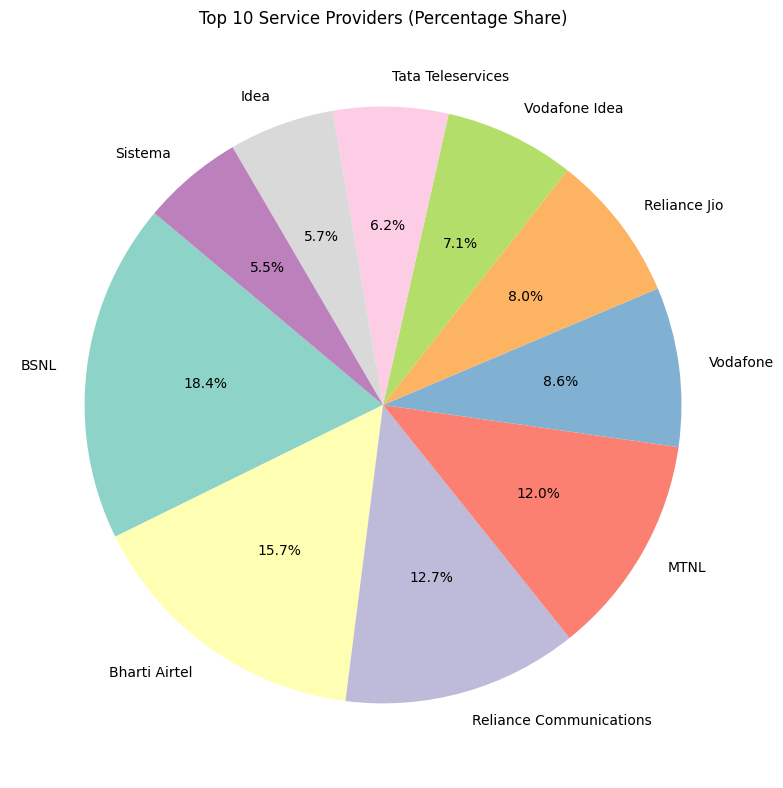

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 service providers
top10 = df['service_provider'].value_counts().head(10)

plt.figure(figsize=(8,8))
plt.pie(top10.values, labels=top10.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Top 10 Service Providers (Percentage Share)')
plt.tight_layout()
plt.show()

# Observation:
# The pie chart shows the distribution of telecom service providers based on their frequency in the dataset.
# BSNL has the largest share (18.4%), followed by Bharti Airtel (15.7%) and Reliance Communications (~12.7%).
# MTNL and Vodafone also have notable proportions, while providers like Sistema and Idea have smaller market shares.
# This indicates BSNL and Airtel are the most dominant service providers among users in the dataset.


## Dropping Columns unit and notes

In [51]:
df=df.drop('notes',axis=1)
df=df.drop('unit',axis=1)

## separating wireles and wireline ,date column formatting

In [52]:
# Create combined date column
df['date'] = pd.to_datetime(df['month'] + ' ' + df['year'].astype(int).astype(str), errors='coerce', format='%B %Y')

# 3️⃣ Split into two DataFrames
df_wireless = df[df['type_of_connection'] == 'wireless'].copy()
df_wireline = df[df['type_of_connection'] == 'wireline'].copy()

In [53]:
df_wireless

,year,month,circle,type_of_connection,service_provider,value,date
0,2025,April,Andhra Pradesh,wireless,Bharti Airtel (Including Tata Tele.),33965795.0,2025-04-01
1,2025,April,Assam,wireless,Bharti Airtel (Including Tata Tele.),12314102.0,2025-04-01
2,2025,April,Bihar,wireless,Bharti Airtel (Including Tata Tele.),40967773.0,2025-04-01
3,2025,April,Delhi,wireless,Bharti Airtel (Including Tata Tele.),18877637.0,2025-04-01
4,2025,April,Gujarat,wireless,Bharti Airtel (Including Tata Tele.),12401101.0,2025-04-01
...,...,...,...,...,...,...,...
47460,2009,January,Uttar Pradesh (East),wireless,BSNL,5597426.0,2009-01-01
47461,2009,January,Uttar Pradesh (West),wireless,BSNL,1698661.0,2009-01-01
47462,2009,January,Uttarakhand,wireless,BSNL,767273.0,2009-01-01
47463,2009,January,West Bengal,wireless,BSNL,1738713.0,2009-01-01


## WIRELESS

In [54]:
# Count how many times each (service_provider, circle) has nonzero 'value'
circle_activity = (
    df_wireless.groupby(['service_provider', 'circle'])['value']
    .apply(lambda x: (x > 0).sum())
    .reset_index(name='nonzero_count')
)

# Compute total records per (service_provider, circle)
total_counts = (
    df_wireless.groupby(['service_provider', 'circle']).size().reset_index(name='total_count')
)

# Merge them
activity_summary = pd.merge(circle_activity, total_counts, on=['service_provider', 'circle'])
activity_summary['activity_ratio'] = activity_summary['nonzero_count'] / activity_summary['total_count']

# Set a threshold (say, less than 0.1 = <10% nonzero entries means inactive)
threshold = 0.1
inactive_circles = activity_summary[activity_summary['activity_ratio'] < threshold]

In [55]:
recent_years = [2023, 2024, 2025]
recent_df_wireless = df_wireless[df_wireless['year'].isin(recent_years)]

# Compute total and nonzero counts in recent years
recent_activity = (
    recent_df_wireless.groupby(['service_provider', 'circle'])['value']
    .apply(lambda x: (x > 0).sum())
    .reset_index(name='nonzero_recent')
)

# Circles with 0 nonzero entries in recent years = inactive
inactive_recent = recent_activity[recent_activity['nonzero_recent'] == 0]

In [56]:
# Step 1: Find low-activity circles overall
inactive_low_activity = activity_summary[activity_summary['activity_ratio'] < 0.1]

# Step 2: Find circles with zero activity in recent years
inactive_recent = recent_activity[recent_activity['nonzero_recent'] == 0]

# Step 3: Combine both
inactive_combined = pd.concat([inactive_low_activity[['service_provider', 'circle']],
                               inactive_recent[['service_provider', 'circle']]]).drop_duplicates()

# Filter out inactive circles
df_wireless_cleaned = df_wireless[~df_wireless.set_index(['service_provider', 'circle']).index.isin(inactive_combined.set_index(['service_provider', 'circle']).index)]

In [57]:
# Count of zeros
zero_count = (df_wireless_cleaned['value'] == 0).sum()

# Count of blanks (empty strings or NaN)
blank_count = df_wireless_cleaned['value'].isna().sum() + (df_wireless['value'] == '').sum()
print(zero_count)
print(blank_count)

1075
2279


#### List of shutdown years and month of serviceproviders

In [58]:
providers = [
    'Bharti Airtel (Including Tata Tele.)',
    'Reliance Communications',
    'Vodafone Idea',
    'BSNL',
    'MTNL',
    'Reliance Jio',
    'BSNL (VNOs)',
    'Bharti Airtel',
    'Tata Teleservices',
    'Vodafone',
    'Idea',
    'Telenor',
    'Aircel',
    'Sistema',
    'Quadrant',
    'Videocon',
    'Telewings',
    'Loop',
    'Unitech',
    'Aircel/Dishnet',
    'Quadrant (HFCL)',
    'S-Tel',
    'Etisalat',
    'Uninor',
    'HFCL',
    'Etisalat/Allianz',
    'Idea/Spice',
    'Vodafone Essar',
    'Loop Telecom Pvt. Ltd.',
    'HFCL Infotel',
    'Sistema Shyam Teleservices Ltd',
    'Spice',
    'BPL Mobile',
    'Tata Telecommunication',
    'STPL',
    'APSFL',
    'V-CON Mobile & Infra Pvt. Ltd.',
    'Bharti Airtel (including Tata Telecommunications)',
    'Reliance',
    'Tata',
    'Teleservice Ltd.',
    'Systema Shyam Teleservices Ltd'
]

# Assign shutdown year/month manually based on telecom history
shutdown_mapping = {
    'Vodafone': (2018, 'March'),
    'Idea': (2018, 'March'),
    'Aircel': (2018, 'April'),
    'Reliance Communications': (2017, 'September'),
    'Videocon': (2010, 'April'),
    'Telenor': (2018, 'May'),
    'Uninor': (2011, 'May'),
    'Loop': (2011, 'May'),
    'Sistema': (2011, 'September'),
    'Etisalat': (2011, 'September'),
    'Reliance': (2017, 'September'),
    'Vodafone Essar': (2018, 'March'),
    'Idea/Spice': (2011, 'September'),
    'Sistema Shyam Teleservices Ltd': (2011, 'September'),
    'S-Tel': (2010, 'August'),
    'Quadrant': (2017, 'March'),
    'HFCL Infotel': (2011, 'September'),
    'Aircel/Dishnet': (2011, 'May'),
    'Unitech': (2013, 'February'),
    'BPL Mobile': (2011, 'September'),
    'Tata Teleservices': (2011, 'September'),
    'STPL': (2011, 'September'),
    'Telewings': (2011, 'September'),
    'Quadrant (HFCL)': (2017, 'March'),
    'Etisalat/Allianz': (2011, 'September'),
    'Loop Telecom Pvt. Ltd.': (2011, 'May'),
    'Spice': (2011, 'September'),
    'Tata Telecommunication': (2011, 'September'),
    'Teleservice Ltd.': (2011, 'September'),
    'Systema Shyam Teleservices Ltd': (2011, 'September')
    # Active providers not listed here will default to 2025
}
data = []
for p in providers:
    if p in ['Vodafone', 'Idea']:
        # Special merged case: Vodafone + Idea → Vodafone Idea (Vi)
        year, month = 2018, 'March'
    elif p in shutdown_mapping:
        year, month = shutdown_mapping[p]
    else:
        year, month = 2025, None  # active providers
    data.append({'service_provider': p, 'shutdown_year': year, 'shutdown_month': month})

shutdown_df = pd.DataFrame(data)
shutdown_df

,service_provider,shutdown_year,shutdown_month
0,Bharti Airtel (Including Tata Tele.),2025,None
1,Reliance Communications,2017,September
2,Vodafone Idea,2025,None
3,BSNL,2025,None
4,MTNL,2025,None
5,Reliance Jio,2025,None
6,BSNL (VNOs),2025,None
7,Bharti Airtel,2025,None
8,Tata Teleservices,2011,September
9,Vodafone,2018,March


/tmp/ipython-input-4172572438.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shutdown_year', y='count', data=shutdown_count, palette='crest')


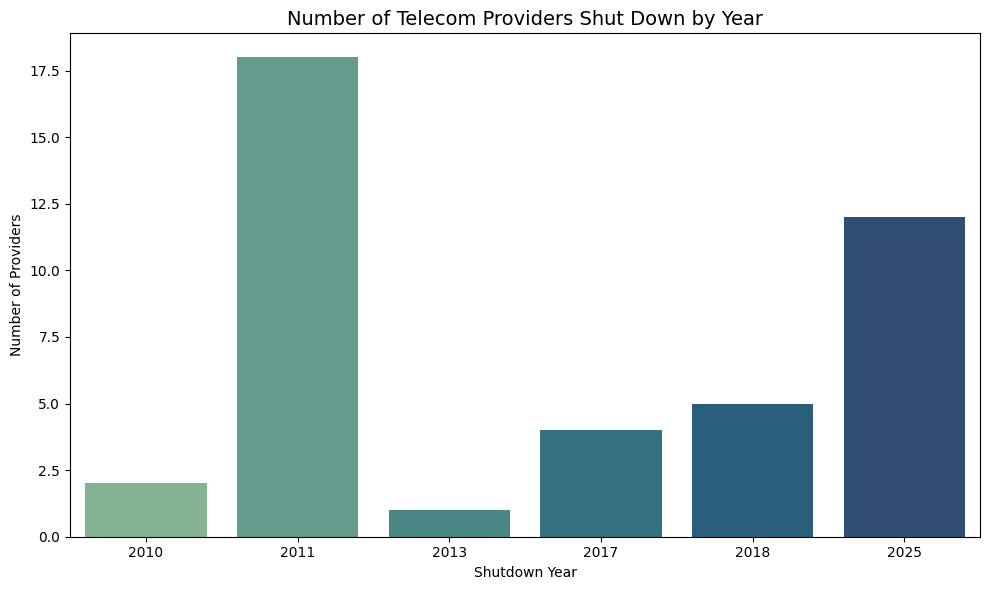

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by shutdown year
shutdown_count = shutdown_df.groupby('shutdown_year').size().reset_index(name='count')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='shutdown_year', y='count', data=shutdown_count, palette='crest')
plt.title('Number of Telecom Providers Shut Down by Year', fontsize=14)
plt.xlabel('Shutdown Year')
plt.ylabel('Number of Providers')
plt.tight_layout()
plt.show()

# 📊 Summary: Number of Telecom Providers Shut Down by Year

- 2011 saw the highest telecom shutdowns (~18 providers) due to the 2G spectrum scam and license cancellations.
- 2017–2018 had moderate closures driven by Reliance Jio’s market disruption and industry consolidation.
- 2025 represents still-active or merged providers like Jio, Airtel, BSNL, and Vi.
- Overall, the industry shrank from 20+ operators in 2010 to a few major players by 2025.



In [59]:
def filter_by_shutdown(df, shutdown_df):
    df = df.copy()
    shutdown_df = shutdown_df.copy()

    # --- Month name to number mapping ---
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # --- Add numeric month columns for both DataFrames ---
    if 'month_num' not in df.columns:
        if 'month' in df.columns:
            df['month_num'] = df['month'].map(month_map)
        else:
            raise KeyError("Your dataframe must contain either 'month_num' or 'month' column.")

    shutdown_df['month_num_shutdown'] = shutdown_df['shutdown_month'].map(month_map)

    # --- Fill missing shutdown months for 2025 as still active (December) ---
    shutdown_df.loc[
        (shutdown_df['shutdown_year'] == 2025) &
        (shutdown_df['month_num_shutdown'].isna()),
        'month_num_shutdown'
    ] = 12

    # --- Merge shutdown info ---
    merged = df.merge(
        shutdown_df[['service_provider', 'shutdown_year', 'month_num_shutdown']],
        on='service_provider', how='left'
    )

    # --- Filter data ---
    filtered = merged[
        (merged['shutdown_year'].isna()) |  # shutdown info missing
        (merged['shutdown_year'] >= 2025) |  # still active
        (merged['year'] < merged['shutdown_year']) |  # before shutdown year
        ((merged['year'] == merged['shutdown_year']) &
         (merged['month_num'] <= merged['month_num_shutdown']))  # same year, before shutdown month
    ].copy()

    filtered.reset_index(drop=True, inplace=True)
    return filtered

In [60]:
df_wireless_filtered = filter_by_shutdown(df_wireless_cleaned, shutdown_df)

In [61]:
df_wireless_filtered

,year,month,circle,type_of_connection,service_provider,value,date,month_num,shutdown_year,month_num_shutdown
0,2025,April,Andhra Pradesh,wireless,Bharti Airtel (Including Tata Tele.),33965795.0,2025-04-01,4,2025,12.0
1,2025,April,Assam,wireless,Bharti Airtel (Including Tata Tele.),12314102.0,2025-04-01,4,2025,12.0
2,2025,April,Bihar,wireless,Bharti Airtel (Including Tata Tele.),40967773.0,2025-04-01,4,2025,12.0
3,2025,April,Delhi,wireless,Bharti Airtel (Including Tata Tele.),18877637.0,2025-04-01,4,2025,12.0
4,2025,April,Gujarat,wireless,Bharti Airtel (Including Tata Tele.),12401101.0,2025-04-01,4,2025,12.0
...,...,...,...,...,...,...,...,...,...,...
25487,2009,January,Uttar Pradesh (East),wireless,BSNL,5597426.0,2009-01-01,1,2025,12.0
25488,2009,January,Uttar Pradesh (West),wireless,BSNL,1698661.0,2009-01-01,1,2025,12.0
25489,2009,January,Uttarakhand,wireless,BSNL,767273.0,2009-01-01,1,2025,12.0
25490,2009,January,West Bengal,wireless,BSNL,1738713.0,2009-01-01,1,2025,12.0


In [62]:
# Count of zeros
zero_count = (df_wireless_filtered['value'] == 0).sum()

# Count of blanks (empty strings or NaN)
blank_count = df_wireless_filtered['value'].isna().sum() + (df_wireless_filtered['value'] == '').sum()
print(zero_count)
print(blank_count)

68
771


In [63]:
# Drop rows where 'value' is 0, NaN, or blank string
df_wireless_filtered = df_wireless_filtered[
    (~df_wireless_filtered['value'].isna()) &          # remove NaNs
    (df_wireless_filtered['value'] != 0) &             # remove zeros
    (df_wireless_filtered['value'] != '')              # remove empty strings
].copy()

# Reset index after dropping
df_wireless_filtered.reset_index(drop=True, inplace=True)

In [64]:
# Verify cleanup
print("Remaining rows:", len(df_wireless_filtered))
print("Zeros:", (df_wireless_filtered['value'] == 0).sum())
print("Blanks/NaN:", df_wireless_filtered['value'].isna().sum() + (df_wireless_filtered['value'] == '').sum())

Remaining rows: 24653
Zeros: 0
Blanks/NaN: 0


## WIRELINE

In [65]:
# Count how many times each (service_provider, circle) has nonzero 'value'
circle_activity = (
    df_wireline.groupby(['service_provider', 'circle'])['value']
    .apply(lambda x: (x > 0).sum())
    .reset_index(name='nonzero_count')
)

# Compute total records per (service_provider, circle)
total_counts = (
    df_wireline.groupby(['service_provider', 'circle']).size().reset_index(name='total_count')
)

# Merge them
activity_summary = pd.merge(circle_activity, total_counts, on=['service_provider', 'circle'])
activity_summary['activity_ratio'] = activity_summary['nonzero_count'] / activity_summary['total_count']

# Set a threshold (say, less than 0.1 = <10% nonzero entries means inactive)
threshold = 0.1
inactive_circles = activity_summary[activity_summary['activity_ratio'] < threshold]

In [66]:
recent_years = [2023, 2024, 2025]
recent_df_wireline = df_wireline[df_wireline['year'].isin(recent_years)]

# Compute total and nonzero counts in recent years
recent_activity = (
    recent_df_wireline.groupby(['service_provider', 'circle'])['value']
    .apply(lambda x: (x > 0).sum())
    .reset_index(name='nonzero_recent')
)

# Circles with 0 nonzero entries in recent years = inactive
inactive_recent = recent_activity[recent_activity['nonzero_recent'] == 0]

In [67]:
# Step 1: Find low-activity circles overall
inactive_low_activity = activity_summary[activity_summary['activity_ratio'] < 0.1]

# Step 2: Find circles with zero activity in recent years
inactive_recent = recent_activity[recent_activity['nonzero_recent'] == 0]

# Step 3: Combine both
inactive_combined = pd.concat([inactive_low_activity[['service_provider', 'circle']],
                               inactive_recent[['service_provider', 'circle']]]).drop_duplicates()

# Filter out inactive circles
df_wireline_cleaned = df_wireline[~df_wireline.set_index(['service_provider', 'circle']).index.isin(
    inactive_combined.set_index(['service_provider', 'circle']).index)]

In [68]:
df_wireline_cleaned

,year,month,circle,type_of_connection,service_provider,value,date
47465,2025,April,Andhra Pradesh,wireline,BSNL,836796.0,2025-04-01
47466,2025,April,Assam,wireline,BSNL,59049.0,2025-04-01
47467,2025,April,Bihar,wireline,BSNL,372420.0,2025-04-01
47469,2025,April,Gujarat,wireline,BSNL,317015.0,2025-04-01
47470,2025,April,Haryana,wireline,BSNL,201952.0,2025-04-01
...,...,...,...,...,...,...,...
70723,2009,January,Uttar Pradesh (East),wireline,BSNL,1440296.0,2009-01-01
70724,2009,January,Uttar Pradesh (West),wireline,BSNL,940266.0,2009-01-01
70725,2009,January,Uttaranchal,wireline,BSNL,300884.0,2009-01-01
70726,2009,January,West Bengal,wireline,BSNL,1038499.0,2009-01-01


In [69]:
# Count of zeros
zero_count = (df_wireline_cleaned['value'] == 0).sum()

# Count of blanks (empty strings or NaN)
blank_count = df_wireline_cleaned['value'].isna().sum() + (df_wireline['value'] == '').sum()
print(zero_count)
print(blank_count)

252
32


In [70]:
# List of wireline service providers
wireline_providers = [
    'Bharti Airtel (Including Tata Tele.)',
    'Reliance Communications',
    'Vodafone Idea',
    'BSNL',
    'MTNL',
    'Reliance Jio',
    'BSNL (VNOs)',
    'Bharti Airtel',
    'Tata Teleservices',
    'Vodafone',
    'Idea',
    'Telenor',
    'Aircel',
    'Sistema',
    'Quadrant',
    'Videocon',
    'Telewings',
    'Loop',
    'Unitech',
    'Aircel/Dishnet',
    'Quadrant (HFCL)',
    'S-Tel',
    'Etisalat',
    'Uninor',
    'HFCL',
    'Etisalat/Allianz',
    'Idea/Spice',
    'Vodafone Essar',
    'Loop Telecom Pvt. Ltd.',
    'HFCL Infotel',
    'Sistema Shyam Teleservices Ltd',
    'Spice',
    'BPL Mobile',
    'Tata Telecommunication',
    'STPL',
    'APSFL',
    'V-CON Mobile & Infra Pvt. Ltd.',
    'Bharti Airtel (including Tata Telecommunications)',
    'Reliance',
    'Tata',
    'Teleservice Ltd.',
    'Systema Shyam Teleservices Ltd'
]

# Assign shutdown year/month manually based on telecom history
shutdown_mapping_wireline = {
    'Vodafone': (2018, 'March'),
    'Idea': (2018, 'March'),
    'Aircel': (2018, 'April'),
    'Reliance Communications': (2017, 'September'),
    'Videocon': (2010, 'April'),
    'Telenor': (2018, 'May'),
    'Uninor': (2011, 'May'),
    'Loop': (2011, 'May'),
    'Sistema': (2011, 'September'),
    'Etisalat': (2011, 'September'),
    'Reliance': (2017, 'September'),
    'Vodafone Essar': (2018, 'March'),
    'Idea/Spice': (2011, 'September'),
    'Sistema Shyam Teleservices Ltd': (2011, 'September'),
    'S-Tel': (2010, 'August'),
    'Quadrant': (2017, 'March'),
    'HFCL Infotel': (2011, 'September'),
    'Aircel/Dishnet': (2011, 'May'),
    'Unitech': (2013, 'February'),
    'BPL Mobile': (2011, 'September'),
    'Tata Teleservices': (2011, 'September'),
    'STPL': (2011, 'September'),
    'Telewings': (2011, 'September'),
    'Quadrant (HFCL)': (2017, 'March'),
    'Etisalat/Allianz': (2011, 'September'),
    'Loop Telecom Pvt. Ltd.': (2011, 'May'),
    'Spice': (2011, 'September'),
    'Tata Telecommunication': (2011, 'September'),
    'Teleservice Ltd.': (2011, 'September'),
    'Systema Shyam Teleservices Ltd': (2011, 'September')
    # Active providers not listed here will default to 2025
}

# Build shutdown dataframe for wireline providers
data_wireline = []
for p in wireline_providers:
    if p in ['Vodafone', 'Idea']:
        # Special merged case: Vodafone + Idea → Vodafone Idea (Vi)
        year, month = 2018, 'March'
    elif p in shutdown_mapping_wireline:
        year, month = shutdown_mapping_wireline[p]
    else:
        year, month = 2025, None  # active providers
    data_wireline.append({'service_provider': p, 'shutdown_year': year, 'shutdown_month': month})

shutdown_df_wireline = pd.DataFrame(data_wireline)
shutdown_df_wireline

,service_provider,shutdown_year,shutdown_month
0,Bharti Airtel (Including Tata Tele.),2025,None
1,Reliance Communications,2017,September
2,Vodafone Idea,2025,None
3,BSNL,2025,None
4,MTNL,2025,None
5,Reliance Jio,2025,None
6,BSNL (VNOs),2025,None
7,Bharti Airtel,2025,None
8,Tata Teleservices,2011,September
9,Vodafone,2018,March


/tmp/ipython-input-3613677389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shutdown_year', y='count', data=shutdown_count, palette='crest')


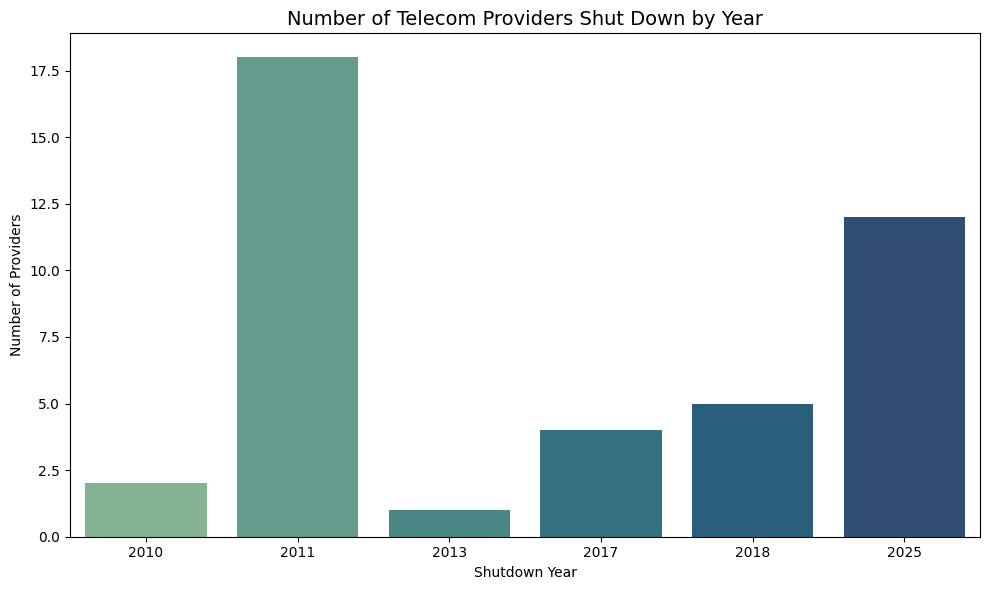

In [71]:
# Group by shutdown year
shutdown_count = shutdown_df_wireline.groupby('shutdown_year').size().reset_index(name='count')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='shutdown_year', y='count', data=shutdown_count, palette='crest')
plt.title('Number of Telecom Providers Shut Down by Year', fontsize=14)
plt.xlabel('Shutdown Year')
plt.ylabel('Number of Providers')
plt.tight_layout()
plt.show()

# 📊 Summary: Number of Wireline Providers Shut Down by Year


- 2011 again shows the highest number of wireline provider exits, mirroring the telecom license cancellations that year.
- 2017–2018 saw a smaller second wave of shutdowns, mainly from consolidation and poor profitability.
- 2025 includes still-operational or merged providers such as BSNL, Airtel, and Jio.
- Overall, the wireline market has contracted steadily, leaving only a few major players active by 2025.



In [72]:
df_wireline_filtered = filter_by_shutdown(df_wireline_cleaned, shutdown_df_wireline)

In [73]:
# Count of zeros
zero_count = (df_wireline_filtered['value'] == 0).sum()

# Count of blanks (empty strings or NaN)
blank_count = df_wireline_filtered['value'].isna().sum() + (df_wireline_filtered['value'] == '').sum()
print(zero_count)
print(blank_count)

250
32


In [74]:
# Drop rows where 'value' is 0, NaN, or blank string
df_wireline_filtered = df_wireline_filtered[
    (~df_wireline_filtered['value'].isna()) &          # remove NaNs
    (df_wireline_filtered['value'] != 0) &             # remove zeros
    (df_wireline_filtered['value'] != '')              # remove empty strings
].copy()

# Reset index after dropping
df_wireline_filtered.reset_index(drop=True, inplace=True)

In [75]:
# Verify cleanup
print("Remaining rows:", len(df_wireline_filtered))
print("Zeros:", (df_wireline_filtered['value'] == 0).sum())
print("Blanks/NaN:", df_wireline_filtered['value'].isna().sum() + (df_wireline_filtered['value'] == '').sum())

Remaining rows: 16967
Zeros: 0
Blanks/NaN: 0


In [76]:
df_combined = pd.concat([df_wireline_filtered, df_wireline_filtered], ignore_index=True)
print("Shape after combining:", df_combined.shape)

Shape after combining: (33934, 10)


In [79]:
# Create a temporary view without these columns
df_view = df_combined.drop(columns=['month_num', 'shutdown_year', 'month_num_shutdown'])

# Display the result
df_view.head()

,year,month,circle,type_of_connection,service_provider,value,date
0,2025,April,Andhra Pradesh,wireline,BSNL,836796.0,2025-04-01
1,2025,April,Assam,wireline,BSNL,59049.0,2025-04-01
2,2025,April,Bihar,wireline,BSNL,372420.0,2025-04-01
3,2025,April,Gujarat,wireline,BSNL,317015.0,2025-04-01
4,2025,April,Haryana,wireline,BSNL,201952.0,2025-04-01


In [80]:
# Save df_combined to CSV
df_view.to_csv('telecom_comb.csv', index=False)

from google.colab import files

files.download('telecom_comb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>